In [14]:
!pip install sklearn statsmodels

You should consider upgrading via the 'C:\Users\Igor Nascimento\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#carregar o arquivo csv 
#por convencao chamamos dataframe de df 
#df = pd.read_csv('................ , sep =';' , encoding = cp1252) ; separador e enconding , usecols =[...]
df = pd.read_csv('synchronous machine.csv', sep = ';', decimal=',')
df.dtypes



Iy     float64
PF     float64
e      float64
dIf    float64
If     float64
dtype: object

In [3]:
df.head() #mostra as 5 primeiras linhas do arquivo
#df.shape

,Iy,PF,e,dIf,If
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497


Informação de Atributo:

Iy (Corrente de carga)
PF (Fator de potência)
e (Erro do fator de potência)
dIf (Mudança da corrente de excitação da máquina síncrona)
If (Corrente de excitação da máquina síncrona)

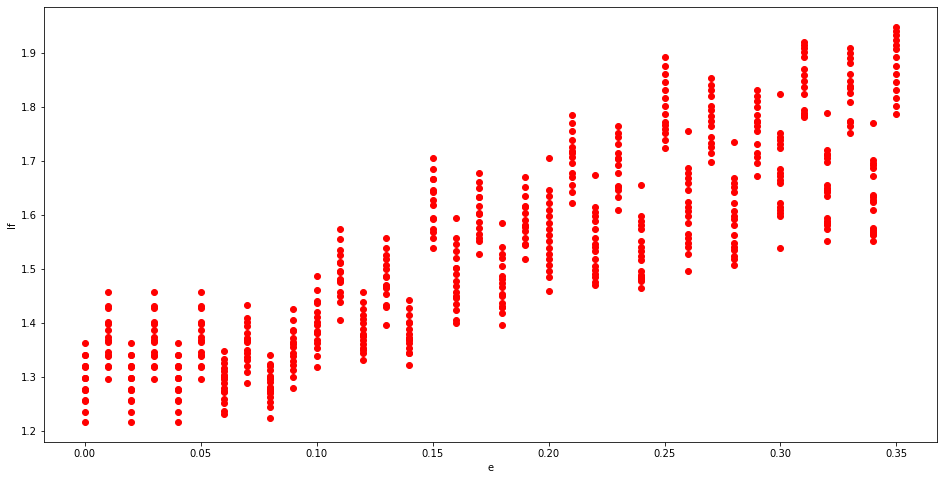

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16,8))
plt.scatter(
    df['e'], 
    df['If'], c='red')
plt.xlabel("e")
plt.ylabel("If")
plt.show()

In [5]:

X = df['e'].values.reshape(-1,1)
y = df['If'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

#Coeficientes requisitados 
print("β0 = {:.5} e β1 = {:.5}".format(reg.intercept_[0], reg.coef_[0][0]))
print()

#Equação do modelo
print("O modelo é: If = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
print()

β0 = 1.2693 e β1 = 1.496

O modelo é: If = 1.2693 + 1.496X



In [6]:
df.dtypes

Iy     float64
PF     float64
e      float64
dIf    float64
If     float64
dtype: object

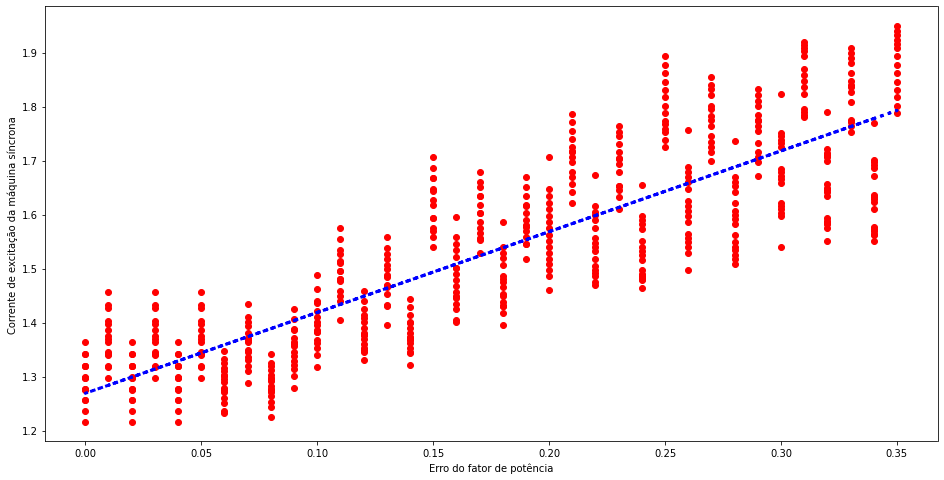

In [7]:
f_previsaoes = reg.predict(X)

plt.figure(figsize = (16,8))
plt.scatter( df['e'], df['If'], c='red')
plt.plot(df['e'],f_previsaoes, c='blue',linewidth=3,linestyle=':')
plt.xlabel("Erro do fator de potência")
plt.ylabel("Corrente de excitação da máquina síncrona")
plt.show()

In [8]:
X = df['e']
y = df['If']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     If   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     1591.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):          4.21e-165
Time:                        13:38:39   Log-Likelihood:                 540.15
No. Observations:                 557   AIC:                            -1076.
Df Residuals:                     555   BIC:                            -1068.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2693      0.008    166.514      0.0

R_squad = 0.741


In [42]:
soma = sum((f_previsaoes - df['If'])**2)/len(df['If])

SyntaxError: EOL while scanning string literal (<ipython-input-42-1bfee046ff88>, line 1)